In [1]:
!scrapy startproject cveparser

New Scrapy project 'cveparser', using template directory 'C:\Users\artem\AppData\Local\Programs\Python\Python311\Lib\site-packages\scrapy\templates\project', created in:
    F:\python\ML-in-Cybersec\PR_5\cveparser

You can start your first spider with:
    cd cveparser
    scrapy genspider example example.com


In [2]:
%cd cveparser

f:\python\ML-in-Cybersec\PR_5\cveparser


c:\Users\artem\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [3]:
# Создание нового spider
import os
os.makedirs(os.path.join('cveparser', 'spiders'), exist_ok=True)
spider_file = open(os.path.join('cveparser', 'spiders', 'kartunchikov_spider.py'), 'w')
spider_file.write("""

import scrapy


class CveparserSpider(scrapy.Spider):
    name = "kartunchikov_spider"
    allowed_domains = ["opencve.io"]
    start_urls = ["https://www.opencve.io/cve"]
    pg_count = 0

    def parse(self, response):
        
        for cve in response.css('tr.cve-header'):
            cve_id = cve.css('td.col-md-2 strong::text').get().strip()
            date = cve.css('td.col-md-2.text-center::text').get().strip()
            
            try:
                cvss_label = cve.css('td.col-md-1.text-center span.label-danger::text').get().strip()
            except:
                cvss_label = cve.css('td.col-md-1.text-center span.label::text').get().strip()

            yield {
                'cve-id': cve_id,
                'date': date,
                'cvss': cvss_label.split()[0],
            }

        
        next_page = response.css('li.next ::attr(href)').get()

        if self.pg_count < 50:
            self.pg_count+=1
            next_page_url = 'https://www.opencve.io' + next_page
            yield response.follow(next_page_url, callback=self.parse)
            

""")
spider_file.close()

# Редактирование настроек проекта
settings_file = open(os.path.join('cveparser', 'settings.py'), 'a')
settings_file.write('\nFEEDS = {\n    "kartunchikov_spider.json": {"format": "json"}\n}')
settings_file.close()

In [4]:
%cd cveparser

f:\python\ML-in-Cybersec\PR_5\cveparser\cveparser


In [ ]:
!scrapy crawl kartunchikov_spider -o kartunchikov_spider.json

In [ ]:

with open('kartunchikov_spider.json', 'r') as file:
    data = file.read()

print(data)

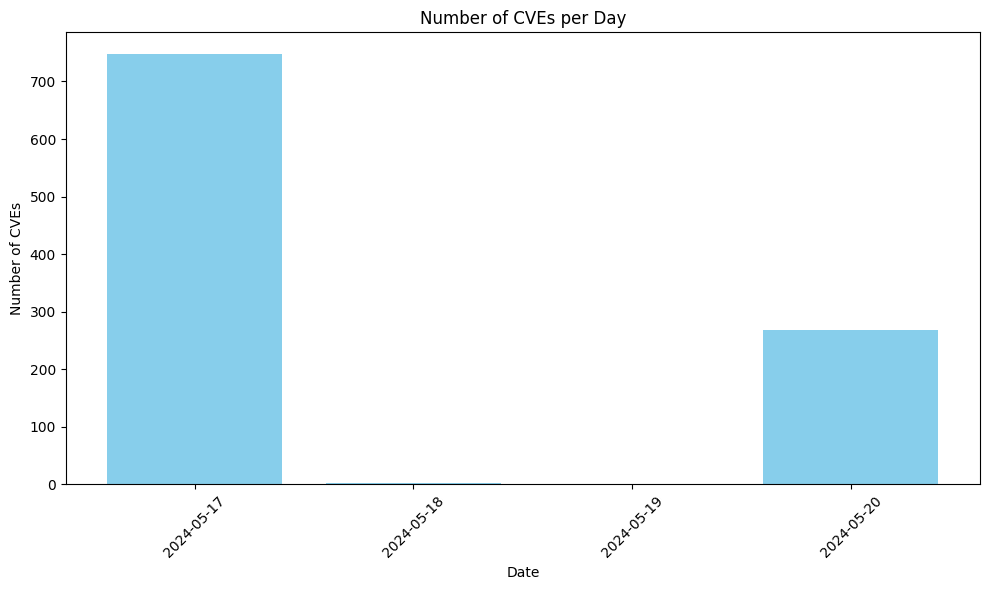

In [8]:
import json
from collections import Counter
import matplotlib.pyplot as plt

# Load the JSON data
with open('kartunchikov_spider.json') as f:
    cve_data = json.load(f)

# Extract dates and count occurrences
dates = [entry['date'] for entry in cve_data]
date_counts = Counter(dates)

# Sort the dates
sorted_dates = sorted(date_counts.keys())

# Plot CVEs per day
plt.figure(figsize=(10, 6))
plt.bar(sorted_dates, [date_counts[date] for date in sorted_dates], color='skyblue')
plt.xlabel('Date')
plt.ylabel('Number of CVEs')
plt.title('Number of CVEs per Day')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

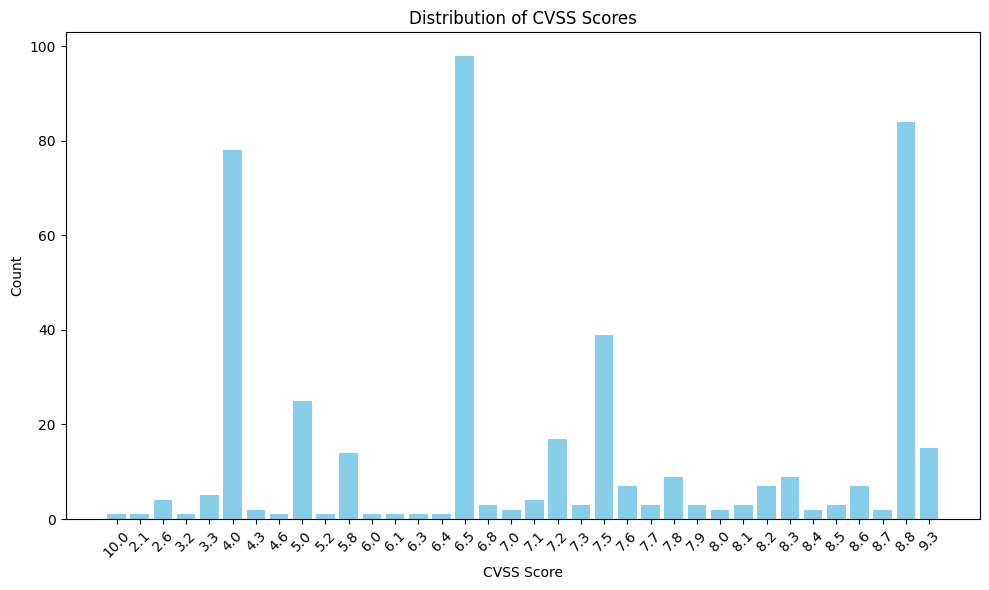

In [25]:
# Extract CVSS scores and count occurrences
cvss_scores = [entry['cvss'] for entry in cve_data if entry['cvss'] != 'N/A']
cvss_counts = Counter(cvss_scores)

# Sort the CVSS scores
sorted_scores = sorted(cvss_counts.keys())

# Plot distribution of CVSS scores
plt.figure(figsize=(10, 6))
plt.bar(sorted_scores, [cvss_counts[score] for score in sorted_scores], color='skyblue')
plt.xlabel('CVSS Score')
plt.ylabel('Count')
plt.title('Distribution of CVSS Scores')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()